## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

from collections import Counter
from collections import defaultdict

from icecream import ic

In [2]:
y = np.array( [291, 440, 571, 830, 1287, 1975, 2744, 4529, 6078, 7700,9720,11889,14490,17335,20522])
X = np.arange(y.shape[0])

reg = LinearRegression().fit(X.reshape(-1, 1), y)
k = reg.coef_
b = reg.intercept_

In [3]:
reg.score(X.reshape(-1, 1), y)

0.8979595063642943

In [4]:
def f(x):
    return k * x + b

In [5]:
int(reg.predict([[15]]))

18033

Text(0.5, 0, '天数')

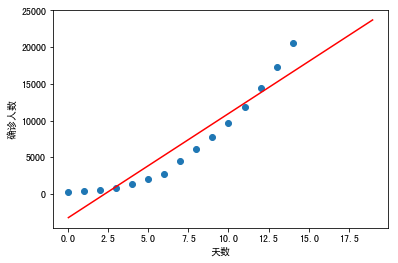

In [6]:
X_=np.arange(20)
plt.scatter(X, y)
plt.plot(X_, f(X_), color = 'red')
plt.ylabel('确诊人数')
plt.xlabel('天数')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [7]:
def model(X, y):
    return [(Xi, yi) for Xi, yi in zip(X, y)]

In [8]:
def predict(x, k=3):
    # 单一维度上使用曼哈顿距离，
    most_similars = sorted(model(X,y), key=lambda xi: np.abs(xi[0]-x))[:k]
    print(most_similars)
    y_hats = [_y for x, _y in most_similars]
    # 取均值
    return np.mean(y_hats)

In [9]:
print(predict(10))

[(10, 9720), (9, 7700), (11, 11889)]
9769.666666666666


#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [10]:
def entropy(elements):
    '''群体的混乱程度'''
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)]
    # ic(probs)
    return - sum(p * np.log(p) for p in probs)

In [11]:
entropy([1, 1, 1, 1])

-0.0

In [12]:
entropy([0, 0, 0, 0])

-0.0

In [13]:
# 加载鸢尾花数据
data, target= load_iris(return_X_y = True)
data = np.c_[data, target]
dataset = pd.DataFrame.from_dict(data)
dataset.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'class']

In [14]:
sample = dataset.sample(50)
sample1 = sample.astype(int)

In [15]:
sample1[:10]

,sepal_len,sepal_width,petal_len,petal_width,class
62,6,2,4,1,1
6,4,3,1,0,0
28,5,3,1,0,0
146,6,2,5,1,2
75,6,3,4,1,1
79,5,2,3,1,1
46,5,3,1,0,0
31,5,3,1,0,0
120,6,3,5,2,2
67,5,2,4,1,1


In [16]:
final_spliter = []
def find_the_optimal_spilter(training_data: pd.DataFrame, target: str, thre = 0) -> str:
    # 集合中的自变量部分
    x_fields = set(training_data.columns.tolist()) - {target}
    
    # 赋初始值
    spliter = None
    min_entropy = float('inf')
    
    print(training_data)
    
    for f in x_fields:
        # 打印自变量名称
        # ic(f)
        # 打印自变量的值
        values = set(training_data[f])
        # ic(values)
        
        for v in values:
            # ic(v)
            sub_spliter_1 = training_data[training_data[f] >= v][target].tolist()
            # 打印自变量对应的因变量取值
            #ic(sub_spliter_1)
            # split by the current feature and one value
            
            # 打印因变量的熵1
            entropy_1 = entropy(sub_spliter_1)
            #ic(entropy_1)
            
            # 打印非该自变量时因变量的取值
            sub_spliter_2 = training_data[training_data[f] < v][target].tolist()
            # ic(sub_spliter_2)
            
            # 打印因变量的熵2
            entropy_2 = entropy(sub_spliter_2)
            #ic(entropy_2)
            
            # 熵1与熵2之和越小，该特征分离效果越显著
            entropy_v = entropy_1 + entropy_2
            # ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                # spliter = （特征，分界值，大于分界时的标签，小于分界时的标签/无则返回-1）
                if sub_spliter_2:
                    spliter = (f, v, Counter(sub_spliter_1).most_common(2)[0][0], Counter(sub_spliter_2).most_common(2)[0][0])    
                else:
                    spliter = (f, v, Counter(sub_spliter_1).most_common(2)[0][0], -1)
    
    print('spliter is: {}'.format(spliter))
    print('the min entropy is: {}'.format(min_entropy))
    print('\n')
    final_spliter.append(spliter)
    
    # 对小于分界值部分继续选择特征
    new_training_data = training_data.loc[training_data[spliter[0]] < spliter[1]]
    if min_entropy > thre and spliter[3] > -1:
        find_the_optimal_spilter(new_training_data, target)
    
    return final_spliter

In [17]:
model=find_the_optimal_spilter(training_data=sample1, target='class')

     sepal_len  sepal_width  petal_len  petal_width  class
62           6            2          4            1      1
6            4            3          1            0      0
28           5            3          1            0      0
146          6            2          5            1      2
75           6            3          4            1      1
79           5            2          3            1      1
46           5            3          1            0      0
31           5            3          1            0      0
120          6            3          5            2      2
67           5            2          4            1      1
44           5            3          1            0      0
51           6            3          4            1      1
111          6            2          5            1      2
33           5            4          1            0      0
145          6            3          5            2      2
80           5            2          3            1     

In [18]:
model

[('petal_len', 3, 1, 0), ('sepal_width', 4, 0, 0)]

In [19]:
def predict(sample, model):
    for rule in model:
        if sample.loc[rule[0]] >= rule[1]:
            return rule[2]
        else:
            return rule[3]

In [20]:
tags = []
for i in range(dataset.shape[0]):
    tag = predict(dataset.iloc[i], model)
    tags.append(tag)

In [21]:
test = [x == y for x, y in zip(dataset['class'].tolist(), tags)]
test0 = [x == y for x, y in zip(dataset['class'].tolist(), tags) if y == 0]
test1 = [x == y for x, y in zip(dataset['class'].tolist(), tags) if x == 0]

In [22]:
(len(test), len(test0), len(test1))

(150, 50, 50)

In [23]:
print('Accuracy = {}'.format(Counter(test)[1]/len(test)))
print('Precision(Class = 0) = {}'.format(Counter(test0)[1]/len(test0)))
print('Recall(Class = 0) = {}'.format(Counter(test1)[1]/len(test1)))

Accuracy = 0.6666666666666666
Precision(Class = 0) = 1.0
Recall(Class = 0) = 1.0


#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

In [24]:
training_data = dataset.iloc[:,[0, 1, 4]]

In [25]:
cluster = KMeans(n_clusters=3, max_iter=500)
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 0.        ],
       [6.74693878, 3.03673469, 1.87755102],
       [5.79607843, 2.71372549, 1.1372549 ]])

In [27]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [28]:
result = np.c_[training_data, cluster.labels_]

In [29]:
result = pd.DataFrame.from_dict(result)
result.columns = ['sepal_len', 'sepal_width', 'class', 'label']

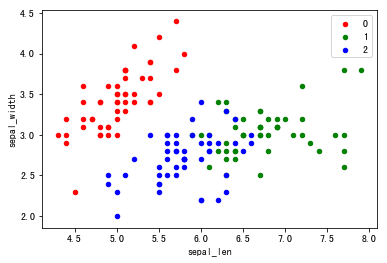

In [30]:
# 根据训练结果的分类绘图
ax=result.loc[result['label']==0].plot(kind = 'scatter', x='sepal_len', y = 'sepal_width', color = 'r', label = 0)
result.loc[result['label']==1].plot(kind = 'scatter', x='sepal_len', y = 'sepal_width',  color = 'g', label =1, ax = ax)
result.loc[result['label']==2].plot(kind = 'scatter', x='sepal_len', y = 'sepal_width',  color = 'b', label =2, ax = ax)

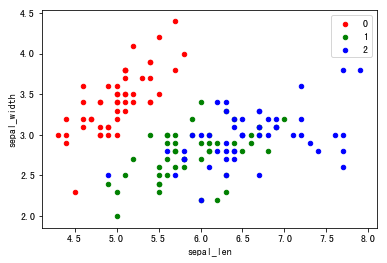

In [31]:
# 根据实际分类绘图
ax=result.loc[result['class']==0].plot(kind = 'scatter', x='sepal_len', y = 'sepal_width', color = 'r', label = 0)
result.loc[result['class']==1].plot(kind = 'scatter', x='sepal_len', y = 'sepal_width',  color = 'g', label =1, ax = ax)
result.loc[result['class']==2].plot(kind = 'scatter', x='sepal_len', y = 'sepal_width',  color = 'b', label =2, ax = ax)

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: A model is a simplified version of something complex, which preserves the main characters so that it can be used to analyze and solve certain kind of problems. While models are not completely perfect, there are situations where super high accuracy is not a must.

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans:Precision(TP/TP+FP) describes how effective the model was at applying a label only when appropriate for a given category. Given a dataset with few negatives, making positive predictions all the time guarantees a high precision. 
Recall(TP/TP+FN) describes how effective the model was at finding all the relevant examples of a category. One has to look at racall if he/she doesn't want to miss any positive samples.
The F-score considers both the precision and the recall. F1-score is the harmonic mean of the precision and recall, where an F1-score reaches its best value at 1 (perfect precision and recall) and worst at 0. In F2-score, recall weighs more than precision.
ROC shows the relationship between TP rate and FP rate. A classifier tends to perform better when the ROC is closer to the top left corner, where TP rate is high and FP rate is low. AUC is the area under ROC, values from 0 through 1 (the best circumstance).

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: In my view, machine learning focuses on the results instead of the procedures. In a traditianal way, one should first find out how things work and then make programmes that go with that. While in machine learning, one makes algorithms first and let computers dig out the rules.

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

In [32]:
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
   # 'pet': [1, 1, 1, 0, 0, 0, 1],
    'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [33]:
dataset2 = pd.DataFrame.from_dict(mock_data)

In [34]:
dataset2

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [49]:
final_spliter = []
model2 = find_the_optimal_spilter(dataset2, 'bought')

  gender income  family_number  bought
0      F    +10              1       1
1      F    -10              1       1
2      F    +10              2       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0
6      M    -10              2       1
spliter is: ('family_number', 2, 1, 0)
the min entropy is: 0.6730116670092565


  gender income  family_number  bought
0      F    +10              1       1
1      F    -10              1       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0
spliter is: ('income', '-10', 1, 0)
the min entropy is: 0.5623351446188083


  gender income  family_number  bought
0      F    +10              1       1
3      F    +10              1       0
4      M    +10              1       0
5      M    +10              1       0
spliter is: ('family_number', 1, 0, -1)
the min entropy is: 0.5623351446188083




In [50]:
model2

[('family_number', 2, 1, 0),
 ('income', '-10', 1, 0),
 ('family_number', 1, 0, -1)]

In [51]:
case = {
    'gender':['F'],
    'income': ['-10'],
    'family_number': [2],
    # 'pet': [11],
    # 'bought': [1, 1, 1, 0, 0, 0, 1],
}

In [52]:
case = pd.DataFrame(case)

In [53]:
case

,gender,income,family_number
0,F,-10,2


In [54]:
predict(case.iloc[0], model2)

1

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

# <评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)

# Define mean absolute loss

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

$$ loss = \frac{1}{n} \sum{|y_i - kx_i - b_i|} $$

# Define partial derivatives

$$
\frac{\partial{loss}}{\partial{k}} = \frac{1}{n}{\sum{sign{(\hat{y_i} - y_i)*x_i}}}
$$

$$
\frac{\partial{loss}}{\partial{b}} = \frac{1}{n}{\sum{sign{(\hat{y_i} - y_i)}}}
$$

In [55]:
#define target function
def price(rm, k, b):
    return k * rm + b

In [56]:
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [57]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    return sum(np.sign(y_hat_i - y_i) * x_i for x_i, y_i, y_hat_i in zip(list(x), list(y),list(y_hat))) / len(y)

def partial_derivative_b(y, y_hat):
    return sum(np.sign(y_hat_i - y_i)  for y_i, y_hat_i in zip(list(y),list(y_hat))) / len(y)

In [58]:
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
X_rm = x[:,5]

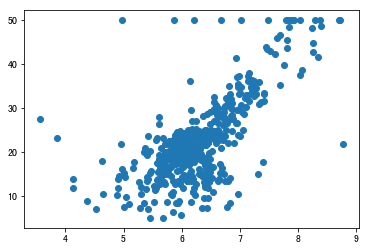

In [59]:
plt.scatter(X_rm,y)

In [60]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 35.44216173600135, parameters k is 24.82650627877787 and b is -98.48403136239274
Iteration 1, the loss is 35.40325319834633, parameters k is 24.820344857829255 and b is -98.48500369440855
Iteration 2, the loss is 35.36434466069135, parameters k is 24.81418343688064 and b is -98.48597602642435
Iteration 3, the loss is 35.32543612303631, parameters k is 24.808022015932025 and b is -98.48694835844016
Iteration 4, the loss is 35.28652758538133, parameters k is 24.80186059498341 and b is -98.48792069045597
Iteration 5, the loss is 35.247619047726296, parameters k is 24.795699174034795 and b is -98.48889302247177
Iteration 6, the loss is 35.208710510071334, parameters k is 24.78953775308618 and b is -98.48986535448758
Iteration 7, the loss is 35.1698019724163, parameters k is 24.783376332137564 and b is -98.49083768650338
Iteration 8, the loss is 35.130893434761255, parameters k is 24.77721491118895 and b is -98.49181001851919
Iteration 9, the loss is 35.091984897106

Iteration 142, the loss is 29.952146853109063, parameters k is 23.954331049528875 and b is -98.62150171812426
Iteration 143, the loss is 29.913706749505327, parameters k is 23.948206510003182 and b is -98.62246614500174
Iteration 144, the loss is 29.87526664590155, parameters k is 23.94208197047749 and b is -98.62343057187921
Iteration 145, the loss is 29.83682654229778, parameters k is 23.935957430951795 and b is -98.62439499875669
Iteration 146, the loss is 29.798386438694035, parameters k is 23.929832891426102 and b is -98.62535942563416
Iteration 147, the loss is 29.759946335090277, parameters k is 23.92370835190041 and b is -98.62632385251163
Iteration 148, the loss is 29.721506231486504, parameters k is 23.917583812374716 and b is -98.6272882793891
Iteration 149, the loss is 29.68306612788273, parameters k is 23.911459272849022 and b is -98.62825270626658
Iteration 150, the loss is 29.644759053649757, parameters k is 23.90533473332333 and b is -98.62921713314405
Iteration 151, th

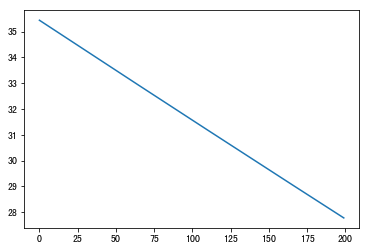

In [61]:
plt.plot(list(range(iteration_num)),losses)

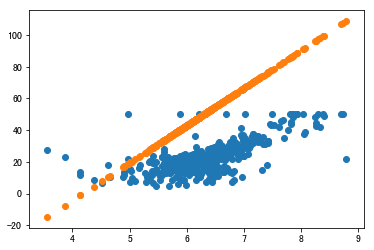

In [62]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)